In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# Measure of central tandency

In [4]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
import seaborn as sns
sns.histplot(df[['charges']])

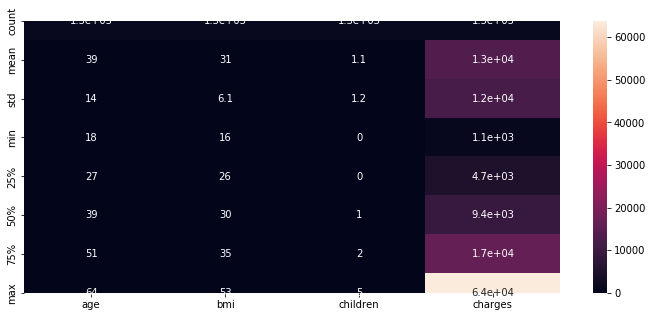

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,5))
sns.heatmap(df.describe(),annot=True,data=df)

In [7]:
df.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


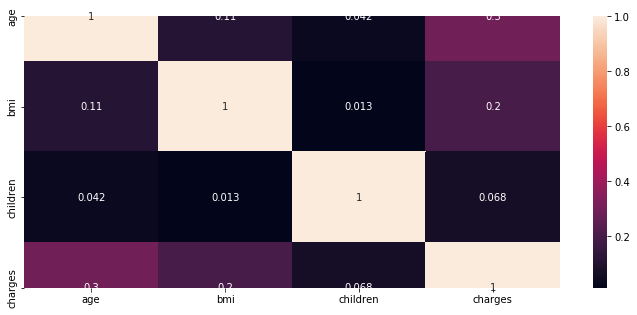

In [8]:
plt.figure(figsize=(12,5))
sns.heatmap(df.corr(),annot=True,data=df)
plt.savefig('corr1.png')

# Encoding

In [9]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [10]:
region1=df.region.unique()
region1

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [11]:
df2=df.copy()
df3=df.copy()
df4=df.copy()
df5=df.copy()
df6=df.copy()
df7=df.copy()
df8=df.copy()
df9=df.copy()
df10=df.copy()
df11=df.copy()
df12=df.copy()
df13=df.copy()
df14=df.copy()
df15=df.copy()


In [12]:
df2.region=df2.region.replace(['southwest', 'southeast', 'northwest', 'northeast'],[1,2,3,4])

In [13]:
df2.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,1,16884.92400
1,18,male,33.770,1,no,2,1725.55230
2,28,male,33.000,3,no,2,4449.46200
3,33,male,22.705,0,no,3,21984.47061
4,32,male,28.880,0,no,3,3866.85520


In [14]:
sex=df.sex.unique()
sex

array(['female', 'male'], dtype=object)

In [15]:
df2.sex=df2.sex.replace(['female', 'male'],[1,2])
df2.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,yes,1,16884.92400
1,18,2,33.770,1,no,2,1725.55230
2,28,2,33.000,3,no,2,4449.46200
3,33,2,22.705,0,no,3,21984.47061
4,32,2,28.880,0,no,3,3866.85520


In [16]:
smoker=df.smoker.unique()
smoker

array(['yes', 'no'], dtype=object)

In [17]:
df2.smoker=df2.smoker.replace(['yes', 'no'],[1,2])

In [18]:
df2.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,2,33.770,1,2,2,1725.55230
2,28,2,33.000,3,2,2,4449.46200
3,33,2,22.705,0,2,3,21984.47061
4,32,2,28.880,0,2,3,3866.85520


# Label Encoder

In [19]:
from sklearn.preprocessing import LabelEncoder

In [20]:
le=LabelEncoder()

In [21]:
df3.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [22]:
df3.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [23]:
for col in df3.columns:
    if df3[col].dtype==np.number:
        continue
    else:
        df3[col]=le.fit_transform(df3[col])

In [24]:
df3.head()

,age,sex,bmi,children,smoker,region,charges
0,1,0,27.900,0,1,3,16884.92400
1,0,1,33.770,1,0,2,1725.55230
2,10,1,33.000,3,0,2,4449.46200
3,15,1,22.705,0,0,1,21984.47061
4,14,1,28.880,0,0,1,3866.85520


In [25]:
import warnings
warnings.filterwarnings('ignore')

In [26]:
from pandas.core.dtypes.common import is_numeric_dtype

In [27]:
for cols in df4.columns:
    if is_numeric_dtype(df4[cols]):
        continue
    else:
        df4[cols]=le.fit_transform(df4[cols])

In [28]:
df4.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


# One hot encoding

In [29]:
dummy=pd.get_dummies(df5['region'],columns=df5.region.unique())
dummy

,northeast,northwest,southeast,southwest
0,0,0,0,1
1,0,0,1,0
2,0,0,1,0
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
1333,0,1,0,0
1334,1,0,0,0
1335,0,0,1,0
1336,0,0,0,1


In [30]:
df5.drop('region',axis=1,inplace=True)
df5.head()

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520


# Dummy Variable Trap

In [31]:
dummy=pd.get_dummies(df6['region'],columns=df6.region.unique(),drop_first=True,prefix='region')

In [32]:
dummy

,region_northwest,region_southeast,region_southwest
0,0,0,1
1,0,1,0
2,0,1,0
3,1,0,0
4,1,0,0
...,...,...,...
1333,1,0,0
1334,0,0,0
1335,0,1,0
1336,0,0,1


In [33]:
df6_new=pd.concat([df5,dummy],axis=1)
df6_new.head()

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,female,27.900,0,yes,16884.92400,0,0,1
1,18,male,33.770,1,no,1725.55230,0,1,0
2,28,male,33.000,3,no,4449.46200,0,1,0
3,33,male,22.705,0,no,21984.47061,1,0,0
4,32,male,28.880,0,no,3866.85520,1,0,0


# One hot using loop

In [34]:
df7.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [35]:
cols=['sex','smoker','region']
for col in cols:
    one=pd.get_dummies(df7[col],drop_first=True,prefix='dummy')
    new_df7=pd.concat([df7,one],axis=1).drop(col,axis=1)

In [36]:
new_df7.head()

,age,sex,bmi,children,smoker,charges,dummy_northwest,dummy_southeast,dummy_southwest
0,19,female,27.900,0,yes,16884.92400,0,0,1
1,18,male,33.770,1,no,1725.55230,0,1,0
2,28,male,33.000,3,no,4449.46200,0,1,0
3,33,male,22.705,0,no,21984.47061,1,0,0
4,32,male,28.880,0,no,3866.85520,1,0,0


In [37]:
cols=['sex','smoker','region']
for col in cols:
    one=pd.get_dummies(df8[cols],drop_first=True,prefix='dummy')
    new_df7=pd.concat([df8,one],axis=1).drop(cols,axis=1)

In [39]:
new_df7.head()

,age,bmi,children,charges,dummy_male,dummy_yes,dummy_northwest,dummy_southeast,dummy_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [49]:
df7_new=new_df7.copy()

# Ordinal Encoding

In [40]:
df9.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [41]:
region=df9.region.unique()
region

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [42]:
from sklearn.preprocessing import OrdinalEncoder

In [43]:
ordinal=OrdinalEncoder(categories=[region])

In [44]:
ordinal

OrdinalEncoder(categories=[array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)],
               dtype=<class 'numpy.float64'>)

In [45]:
encoded_values=ordinal.fit_transform(df9[['region']])

In [46]:
encoded_values

array([[0.],
       [1.],
       [1.],
       ...,
       [1.],
       [0.],
       [2.]])

In [47]:
encoded_values=pd.DataFrame(encoded_values,columns=['region'])

In [48]:
encoded_values

,region
0,0.0
1,1.0
2,1.0
3,2.0
4,2.0
...,...
1333,2.0
1334,3.0
1335,1.0
1336,0.0


In [55]:
df9=pd.concat([df9.drop('region',axis=1),encoded_values],axis=1)

In [56]:
df9.head()

,age,sex,bmi,children,smoker,charges,region
0,19,female,27.900,0,yes,16884.92400,0.0
1,18,male,33.770,1,no,1725.55230,1.0
2,28,male,33.000,3,no,4449.46200,1.0
3,33,male,22.705,0,no,21984.47061,2.0
4,32,male,28.880,0,no,3866.85520,2.0
